# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


In [1146]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pylab as pl
import os
import zipfile
import urllib


%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

### zipcode shapefile

In [1147]:
url = ' https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
fname = 'ZIP_CODE_040114.zip'
urllib.request.urlretrieve(url, fname)

('ZIP_CODE_040114.zip', <http.client.HTTPMessage at 0x7f7358137e48>)

In [1148]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
puidata = os.getenv("PUIDATA")

In [1149]:
!mv ZIP_CODE_040114.zip $PUIDATA

In [1150]:
!unzip -o $PUIDATA/ZIP_CODE_040114.zip -d $PUIDATA

Archive:  /nfshome/sl4729/PUIdata/ZIP_CODE_040114.zip
  inflating: /nfshome/sl4729/PUIdata/ZIP_CODE_040114.shx  
  inflating: /nfshome/sl4729/PUIdata/ZIP_CODE_040114.dbf  
  inflating: /nfshome/sl4729/PUIdata/ZIP_CODE_040114.prj  
  inflating: /nfshome/sl4729/PUIdata/ZIP_CODE_040114.sbn  
  inflating: /nfshome/sl4729/PUIdata/ZIP_CODE_040114.sbx  
  inflating: /nfshome/sl4729/PUIdata/ZIP_CODE_040114.shp  
  inflating: /nfshome/sl4729/PUIdata/ZIP_CODE_040114.shp.xml  


In [1151]:
zip_shp = gpd.GeoDataFrame.from_file(puidata + '/' + 'ZIP_CODE_040114.shp')
zip_shp.head()
len(zip_shp['ZIPCODE'].unique())

248

In [1152]:
zip_shp = zip_shp.drop_duplicates('ZIPCODE')

In [1153]:
zip_shp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


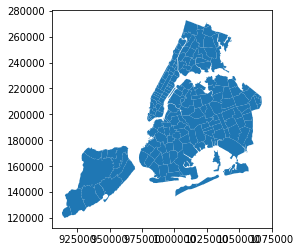

In [1154]:
zip_shp.plot()

### census bureau business data for all years 1993-2014.

In [1155]:
url ='https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp00totals.zip?raw=true'
fname = 'zbp00totals'
urllib.request.urlretrieve(url, fname)

('zbp00totals', <http.client.HTTPMessage at 0x7f7358108a20>)

In [1156]:
dataframe = pd.DataFrame()
type(dataframe)

pandas.core.frame.DataFrame

In [1157]:
url ='https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp94totals.zip?raw=true'
fname = 'zbp94totals.zip'
urllib.request.urlretrieve(url, fname)
zf = zipfile.ZipFile(fname)
df_ = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
df_ = df_[['zip','est']]
df_.head()

,zip,est
0,1001,439
1,1002,450
2,1003,10
3,1004,47
4,1005,92


In [1158]:
year_list = [95, 96, 97, 98, 99, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
dataframe = pd.DataFrame()
for i in year_list:
    url = 'https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp%02dtotals.zip?raw=true'%i
    #print(url)
    fname = 'zbp%02dtotals.zip'%i
    #print(fname)
    urllib.request.urlretrieve(url, fname)
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))

    
    try:
        dataframe['est'] = df['EST']
    except:
        dataframe['est'] = df['est']
    try:
        dataframe['zip'] = df['ZIP']
    except:
        dataframe['zip'] = df['zip']
        
    df_ = df_.merge(dataframe, right_on = 'zip', left_on = 'zip', how = 'left')







# print(dff.shape)
# #             zipcode = pd.merge(zipcode, dff, left_on = 'ZIPCODE', right_on = 'zip', how = 'right')  
# #     print(frame_name.shape)



# #     try:
# #         datadata = datadata.join(df[['zip','est']],on = 'zip', how = 'outer')
# #     except:
# #         datadata = datadata.join(df[['ZIP','EST']],on = 'ZIP', how = 'outer')

# #     est.append(row)    

In [1159]:
df_.head()

,zip,est_x,est_y,est_x,est_y,est_x,est_y,est_x,est_y,est_x,...,est_y,est_x,est_y,est_x,est_y,est_x,est_y,est_x,est_y,est
0,1001,439,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
1,1002,450,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
2,1003,10,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0
3,1004,47,48.0,47.0,41.0,31.0,35.0,48.0,37.0,23.0,...,31.0,30.0,20.0,18.0,18.0,21.0,19.0,16.0,16.0,13.0
4,1005,92,95.0,101.0,104.0,95.0,82.0,86.0,90.0,94.0,...,94.0,98.0,106.0,97.0,87.0,96.0,91.0,94.0,97.0,97.0


In [1160]:
year_list = [94, 95, 96, 97, 98, 99, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
columns = ['ZIPCODE']
est = ['est%02d'%x for x in year_list]
columns = columns + est
df_.columns = columns
df_.head()

,ZIPCODE,est94,est95,est96,est97,est98,est99,est00,est01,est02,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,1001,439,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
1,1002,450,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
2,1003,10,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0
3,1004,47,48.0,47.0,41.0,31.0,35.0,48.0,37.0,23.0,...,31.0,30.0,20.0,18.0,18.0,21.0,19.0,16.0,16.0,13.0
4,1005,92,95.0,101.0,104.0,95.0,82.0,86.0,90.0,94.0,...,94.0,98.0,106.0,97.0,87.0,96.0,91.0,94.0,97.0,97.0


In [1161]:
type(zip_shp['ZIPCODE'][1])

str

In [1162]:
type(df_['ZIPCODE'][1])

numpy.int64

In [1163]:
zip_shp['ZIPCODE'] = zip_shp['ZIPCODE'].astype(np.int)

In [1164]:
zip_est = zip_shp.merge(df_, on = 'ZIPCODE', how = 'left')

In [1165]:
zip_est = zip_est[columns]

In [1166]:
zip_est.shape

(248, 22)

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [1167]:
import geopandas as gp
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [1168]:
print(nyczipsshp.ZIPCODE.values)

['11436' '11213' '11212' '11225' '11218' '11226' '11219' '11210' '11230'
 '11204' '10471' '10470' '10466' '10467' '10463' '10475' '10464' '10469'
 '10468' '10463' '10458' '10034' '10033' '10462' '10040' '10453' '10465'
 '10464' '10464' '10461' '10457' '10460' '10032' '10452' '10456' '10472'
 '10031' '10039' '10459' '10451' '10473' '10030' '10027' '10474' '10455'
 '10037' '10024' '10454' '10026' '10035' '10048' '10025' '11357' '10029'
 '00083' '11356' '11359' '11360' '11105' '10128' '10023' '11363' '10028'
 '11354' '11102' '11370' '10021' '11358' '11362' '10044' '11369' '11103'
 '11106' '11368' '11377' '11355' '11101' '11364' '10018' '10020' '11005'
 '10017' '10001' '10011' '10016' '11104' '11109' '10010' '11367' '10014'
 '10003' '11222' '10002' '11378' '10009' '10012' '10013' '10007' '11237'
 '11385' '10038' '11206' '10006' '11412' '10005' '11251' '10004' '11411'
 '11201' '10004' '11205' '11208' '11207' '10004' '10004' '11413' '11217'
 '11238' '11231' '11422' '11420' '11417' '11215' '1

In [1169]:
# 21 years of data and 248 zipcodes
cbs = zip_est.copy().set_index('ZIPCODE')
print(cbs.shape)
cbs.head()

(248, 21)


,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [1170]:
#cleaning all missing values
cleancsb = cbs.dropna(axis=0, how='all').fillna(value=0)
cleancsb.head()

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [1231]:
#standardization
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T
vals.head()

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.087870,-0.117160,...,0.292900,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853
11213,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.150580,0.060232,...,-0.058923,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875
11212,-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,-0.212389,-0.164301,...,-0.092169,-0.296543,-0.092169,0.088161,0.629152,1.254297,1.422605,1.518781,1.639001,1.891464
11225,-1.223282,-1.159696,-1.149098,-0.915948,-0.852361,-0.926545,-0.841764,-0.788775,-0.184704,-0.089324,...,-0.057531,0.027251,0.186217,0.249804,0.493552,0.885668,1.065830,1.341371,1.871258,2.115007
11218,-1.474935,-1.336988,-1.180649,-1.061095,-0.863371,-0.720826,-0.665648,-0.578281,-0.357567,-0.270200,...,0.120649,0.116050,0.327569,0.419533,0.695427,0.773596,0.998909,1.375964,1.753018,1.978331


In [1232]:
vals.shape

(240, 21)

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (240)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape should be (240)

### cluster with kmeans

In [1233]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [1234]:
nc = 5
km = KMeans(n_clusters=nc, random_state=125).fit(vals)

In [1235]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(240,)

In [1236]:
labels_km = km.labels_
labels_km

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 0, 2, 2, 2, 4, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 4, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 3, 1, 0, 0, 4, 2, 4, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       4, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 3, 3, 1, 2, 1, 1, 0,
       2, 2, 4, 1, 3, 3, 1, 1, 4, 0, 1, 4, 1, 2, 1, 1, 2, 3, 1, 2, 1, 3, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 4, 4, 1, 3, 3, 1, 2, 1, 4, 3,
       1, 1, 0, 0, 2, 4, 4, 3, 4, 0], dtype=int32)

In [1237]:
clust={cleancsb.index[i].astype('int64'):labels_km[i] for i in range(len(labels_km))}
clust[11436]

2

In [1238]:
83 in nyczipsshp.ZIPCODE.values

False

In [1239]:
def map_clust(x):
    try:
        return clust[x]
    except: 
        return None
    

In [1240]:
nyczipsshp = nyczipsshp[['ZIPCODE','geometry']]
nyczipsshp['clust'] = nyczipsshp.ZIPCODE.astype('int64').apply(lambda x : map_clust(x))
nyczipsshp.head()

,ZIPCODE,geometry,clust
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",2.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",2.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",2.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",2.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",2.0


In [1241]:
vals['clust'] = [map_clust(x) for x in vals.index]

### The map of the clusters may look something like this

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


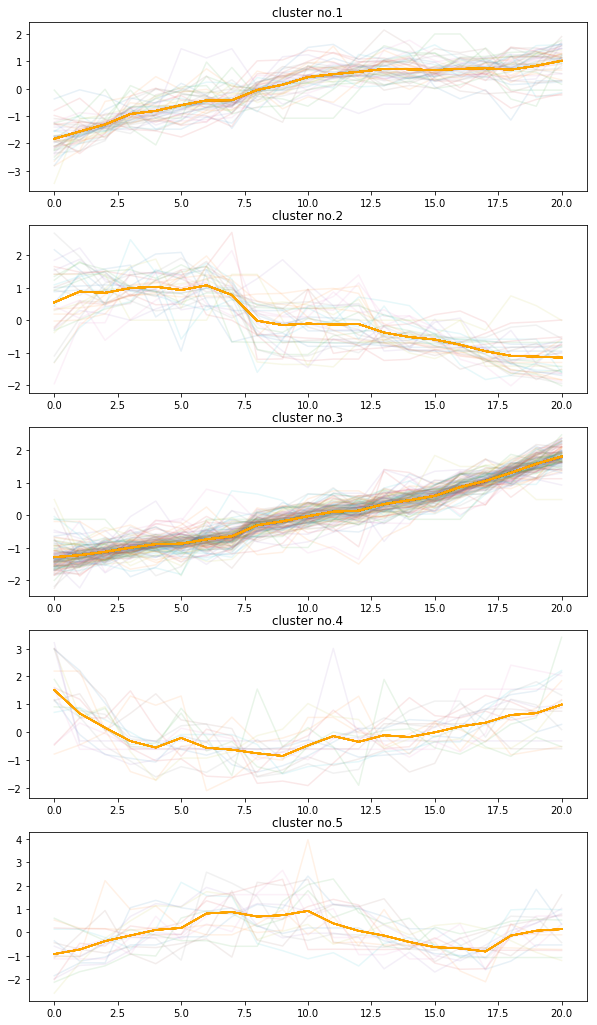

In [1242]:
fig = plt.figure(figsize = (10,18))
for i in range (nc):
    for idx, rows in vals[vals.clust == i].iterrows():
#         print(idx,rows)
        ax = fig.add_subplot(5,1,i+1)
        ax.plot(list(range(len(rows)-1)),rows[:-1],alpha=0.1)
        ax.plot(list(range(len(rows)-1)),km.cluster_centers_[i], color = 'orange')
        
#     ax = fig.add_subplot()
#     nyczipsshp[nyczipsshp.clust == 1.0].plot(alpha=0.5)

        ax.set_title('cluster no.%d'%(i+1))
    

### Figure 2: 
The business pattern time series.

Text(0.5,1,'K-Means clustering for NYC Establishments with K = 5')

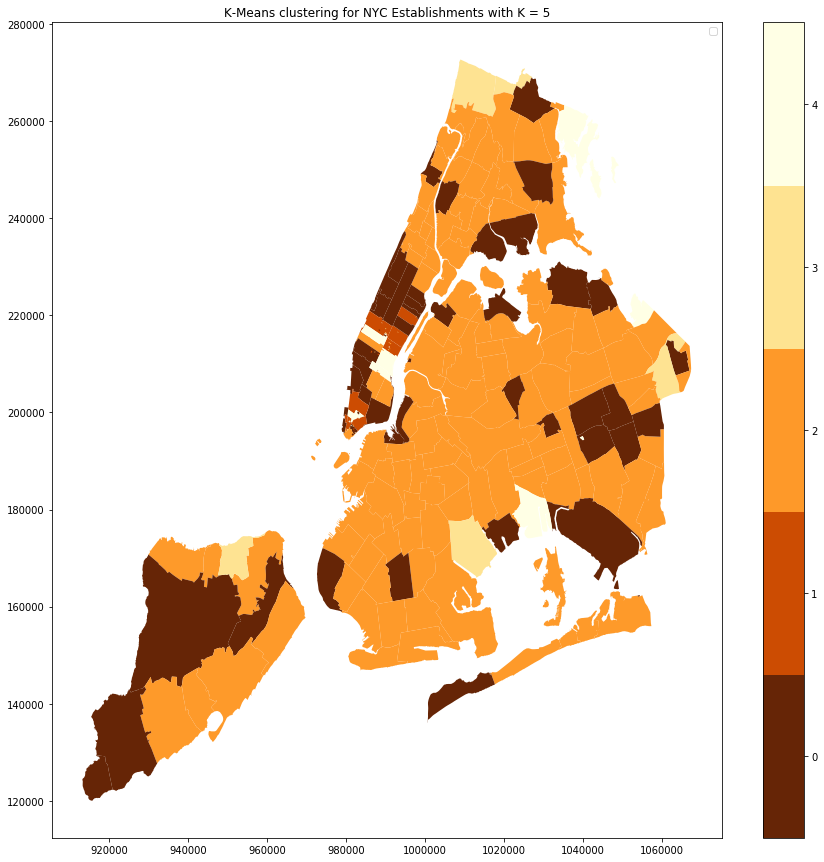

In [1243]:
f, ax = plt.subplots(1, figsize=(15, 15))  
#setting for discrete colorbar legend
cmap = plt.get_cmap("YlOrBr_r", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust', ax = ax, cmap = 'YlOrBr_r')
ax.legend(nyczipsshp['clust'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('K-Means clustering for NYC Establishments with K = 5')

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

In [1270]:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T
vals.head(2)

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.08787,-0.117160,...,0.292900,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853
11213,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.15058,0.060232,...,-0.058923,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875


In [1271]:
nc = 3
km3 = KMeans(n_clusters=nc, random_state=125).fit(vals)
km3.labels_.shape

(240,)

In [1272]:
labels_km3 = km3.labels_
labels_km3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 1, 2, 0, 2, 1], dtype=int32)

In [1273]:
clust3={cleancsb.index[i].astype('int64'):labels_km3[i] for i in range(len(labels_km3))}

In [1274]:
def map_clust3(x):
    try:
        return clust3[x]
    except: 
        return None

In [1275]:
nyczipsshp['clust3'] = nyczipsshp.ZIPCODE.astype('int64').apply(lambda x : map_clust3(x))
nyczipsshp.head()

,ZIPCODE,geometry,clust,clust3,clust7
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",2.0,1.0,1.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",2.0,1.0,1.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",2.0,1.0,1.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",2.0,1.0,1.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",2.0,1.0,1.0


In [1276]:
vals['clust3'] = [map_clust3(x) for x in vals.index]
#vals = vals.drop(['clust'], axis = 1)
vals.head(3)

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est06,est07,est08,est09,est10,est11,est12,est13,est14,clust3
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.087870,-0.117160,...,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853,1
11213,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.150580,0.060232,...,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875,1
11212,-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,-0.212389,-0.164301,...,-0.296543,-0.092169,0.088161,0.629152,1.254297,1.422605,1.518781,1.639001,1.891464,1


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


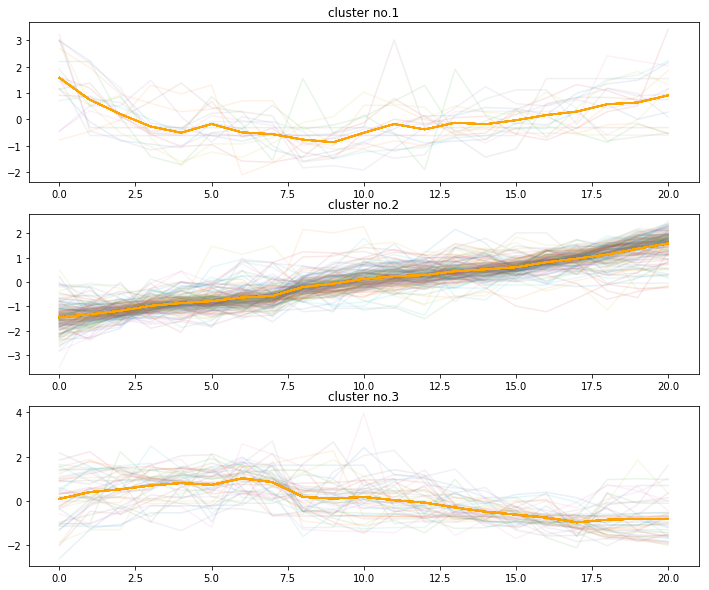

In [1284]:
nc = 3
fig = plt.figure(figsize = (12,10))
for i in range (nc):
    for idx, rows in vals[vals.clust3 == i].iterrows():
#         print(idx,rows)
        ax = fig.add_subplot(nc,1,i+1)
        ax.plot(list(range(len(rows)-1)),rows[:-1],alpha=0.1)
        ax.plot(list(range(len(rows)-1)),km3.cluster_centers_[i], color = 'orange')
        
#     ax = fig.add_subplot()
#     nyczipsshp[nyczipsshp.clust == 1.0].plot(alpha=0.5)

        ax.set_title('cluster no.%d'%(i+1))
    

Text(0.5,1,'K-Means clustering for NYC Establishments with K = 3')

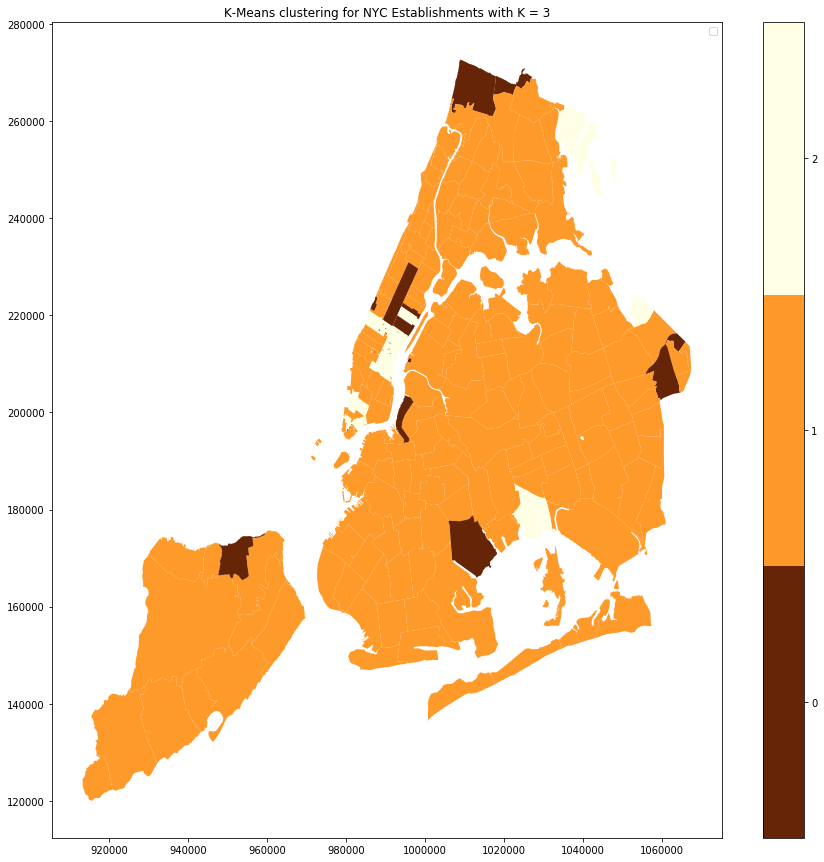

In [1269]:
nc = 3
f, ax = plt.subplots(1, figsize=(15, 15))  
#setting for discrete colorbar legend
cmap = plt.get_cmap("YlOrBr_r", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust3', ax = ax, cmap = 'YlOrBr_r')
ax.legend(nyczipsshp['clust3'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('K-Means clustering for NYC Establishments with K = 3')

### Figure 4: 
cloropleth of  cluster centers for 3 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

In [1298]:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [1299]:
nc = 7
km7 = KMeans(n_clusters=nc, random_state=125).fit(vals)
km7.labels_.shape

(240,)

In [1300]:
labels_km7 = km7.labels_
labels_km7

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 5, 5, 0, 3, 3, 3, 4, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3,
       3, 6, 0, 0, 3, 3, 3, 0, 3, 0, 0, 4, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 1, 6, 0, 0, 4, 3, 4, 3, 0, 3, 3, 0, 3, 3, 0, 6,
       4, 3, 3, 2, 3, 6, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 0, 5, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 5, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 4, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 5, 5, 2, 3, 2, 6, 0,
       3, 3, 4, 2, 5, 1, 2, 6, 4, 0, 6, 6, 2, 3, 2, 2, 3, 5, 6, 3, 2, 1, 4,
       2, 2, 6, 6, 6, 6, 2, 6, 1, 0, 5, 3, 5, 4, 4, 2, 1, 1, 6, 5, 6, 2, 5,
       2, 6, 0, 0, 3, 4, 4, 5, 4, 0], dtype=int32)

In [1301]:
clust7={cleancsb.index[i].astype('int64'):labels_km7[i] for i in range(len(labels_km7))}

In [1302]:
def map_clust7(x):
    try:
        return clust7[x]
    except: 
        return None
    
vals['clust7'] = [map_clust7(x) for x in vals.index]
nyczipsshp['clust7'] = [map_clust7(x) for x in nyczipsshp.ZIPCODE.astype('int64')]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


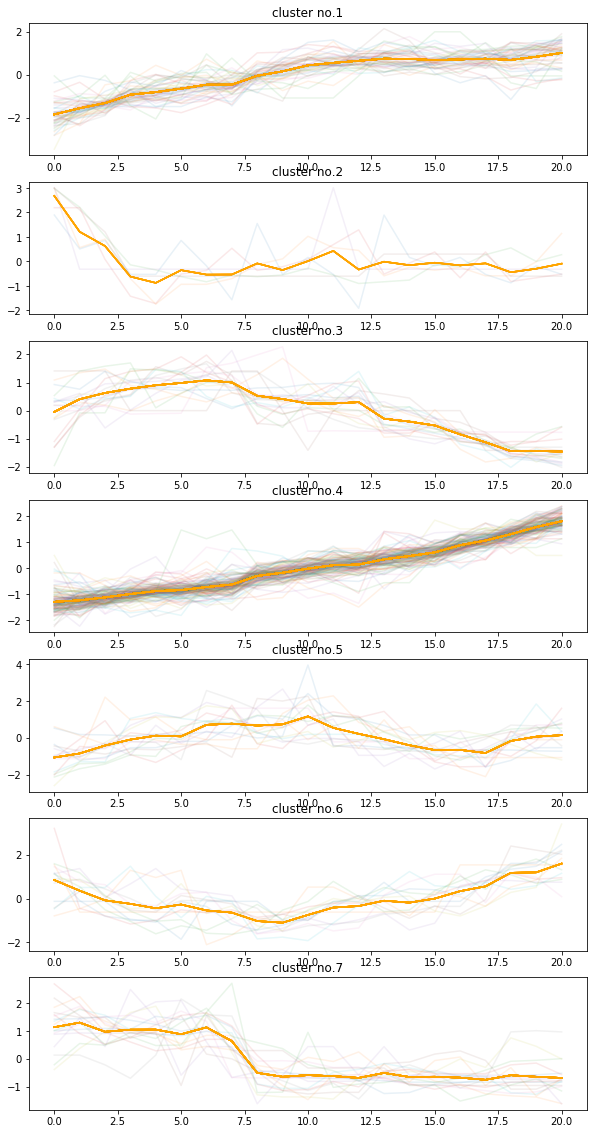

In [1306]:
fig = plt.figure(figsize = (10,20))
for i in range (nc):
    for idx, rows in vals[vals.clust7 == i].iterrows():
#         print(idx,rows)
        ax = fig.add_subplot(nc,1,i+1)
        ax.plot(list(range(len(rows)-1)),rows[:-1],alpha=0.1)
        ax.plot(list(range(len(rows)-1)),km7.cluster_centers_[i], color = 'orange')
        
#     ax = fig.add_subplot()
#     nyczipsshp[nyczipsshp.clust == 1.0].plot(alpha=0.5)

        ax.set_title('cluster no.%d'%(i+1))

Text(0.5,1,'K-Means clustering for NYC Establishments with K = 7')

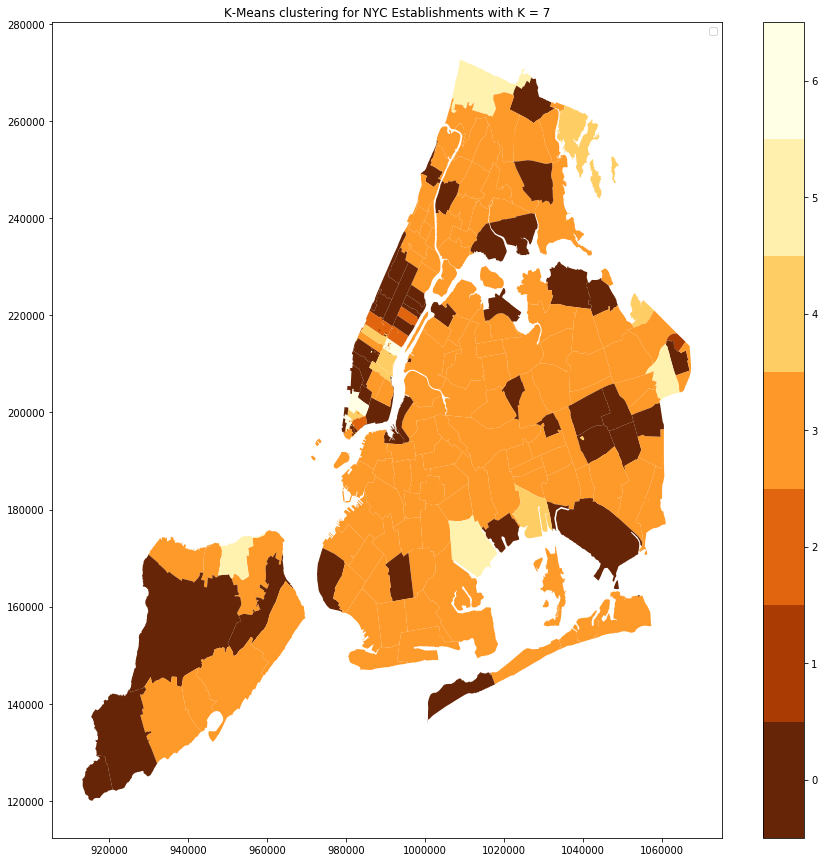

In [1460]:
nc = 7
f, ax = plt.subplots(1, figsize=(15, 15))  
#setting for discrete colorbar legend
cmap = plt.get_cmap("YlOrBr_r", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust7', ax = ax, cmap = 'YlOrBr_r')
ax.legend(nyczipsshp['clust7'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('K-Means clustering for NYC Establishments with K = 7')

### Figure 5: 
cloropleth of  cluster centers for 7 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### cluster with agglomerative clustering

#### 5 clusters

In [1353]:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [1354]:
nc = 5
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag5 = agc.labels_
#centroidsag = np.zeros((nc, vals.shape[1]))
print(labelsag5.shape)
labelsag5

(240,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 3, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 4, 2, 1, 2, 1, 1, 2,
       2, 2, 0, 1, 4, 3, 1, 1, 0, 2, 1, 4, 1, 2, 1, 1, 2, 2, 4, 2, 1, 3, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 4, 0, 0, 1, 3, 3, 1, 2, 1, 0, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 0, 2])

In [1355]:
agc?

In [1356]:
clust_agc5={cleancsb.index[i].astype('int64'):labelsag5[i] for i in range(len(labelsag5))}

In [1357]:
def map_clust(x, clust):
    try:
        return clust[x]
    except: 
        return None

In [1358]:
vals['clust_agc5'] = [map_clust(x, clust_agc5) for x in vals.index]
nyczipsshp['clust_agc5'] = [map_clust(x, clust_agc5) for x in nyczipsshp.ZIPCODE.astype('int64')]

In [1361]:
vals[vals.clust_agc5 == i].iloc[:,:-1]

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10013,-0.208985,0.549121,0.489963,0.803284,0.476816,0.496536,1.668753,2.705124,-1.205918,-1.190580,...,-1.019678,-0.901360,-0.846584,-0.699783,-0.842202,-0.691019,-0.403990,-0.086286,-0.051229,0.007930
10153,1.142087,1.376456,0.048362,0.673347,1.376456,0.438978,0.282732,0.126485,-1.592225,-1.357855,...,-1.201609,-0.967239,-0.654747,-1.435979,-1.123486,0.595224,0.829594,0.829594,0.751471,0.751471
10168,1.455486,0.773227,0.636775,-0.250162,-0.318387,0.227420,0.295645,-1.000646,-1.614679,-1.478227,...,-1.478227,-1.341776,0.159194,0.773227,1.114356,1.114356,-0.181936,1.182582,0.977904,0.090968
10107,0.135140,0.135140,-0.214145,-0.694412,0.135140,2.143528,1.575940,1.532280,-0.476109,-0.781733,...,-0.869054,-1.436642,-0.476109,-0.214145,-0.519769,-1.043696,-0.738072,0.964692,1.008352,0.964692
10172,-0.380860,0.373674,0.977301,1.656382,1.882742,0.373674,1.656382,0.222767,-1.286301,-1.361754,...,-1.437208,-0.682674,-0.607220,-0.456313,-0.456313,-0.003593,-0.305407,0.750941,0.449127,-0.003593
10155,-0.463163,0.509480,0.509480,1.482123,0.104212,-0.868431,0.104212,-0.138949,-1.841075,-1.760021,...,-1.111592,-0.301056,0.428426,1.238962,0.590533,0.509480,0.752641,0.428426,0.590533,1.157909


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


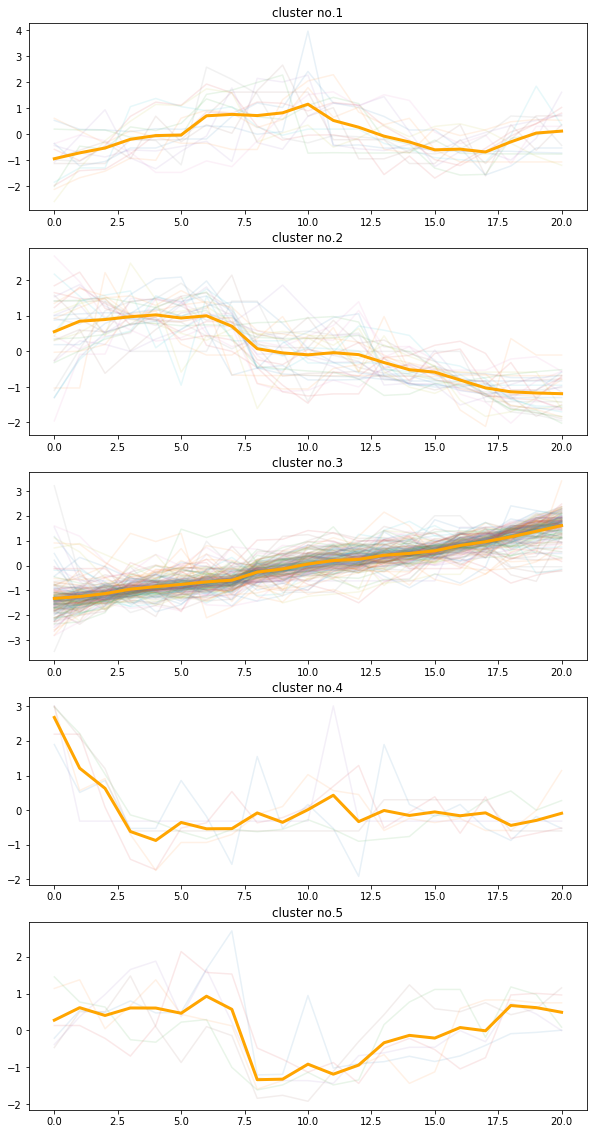

In [1366]:
fig = plt.figure(figsize = (10,20))
for i in range (nc):
    for idx, rows in vals[vals.clust_agc5 == i].iterrows():
#         print(idx,rows)
        ax = fig.add_subplot(nc,1,i+1)
        ax.plot(list(range(len(rows)-1)),rows[:-1],alpha=0.1)
    ax.plot(range(21), vals[vals.clust_agc5 == i].iloc[:,:-1].mean(axis=0), color = 'orange',linewidth = 3)
        
#     ax = fig.add_subplot()
#     nyczipsshp[nyczipsshp.clust == 1.0].plot(alpha=0.5)

    ax.set_title('cluster no.%d'%(i+1))

Text(0.5,1,'agglomerative clustering for NYC Establishments with K = 5')

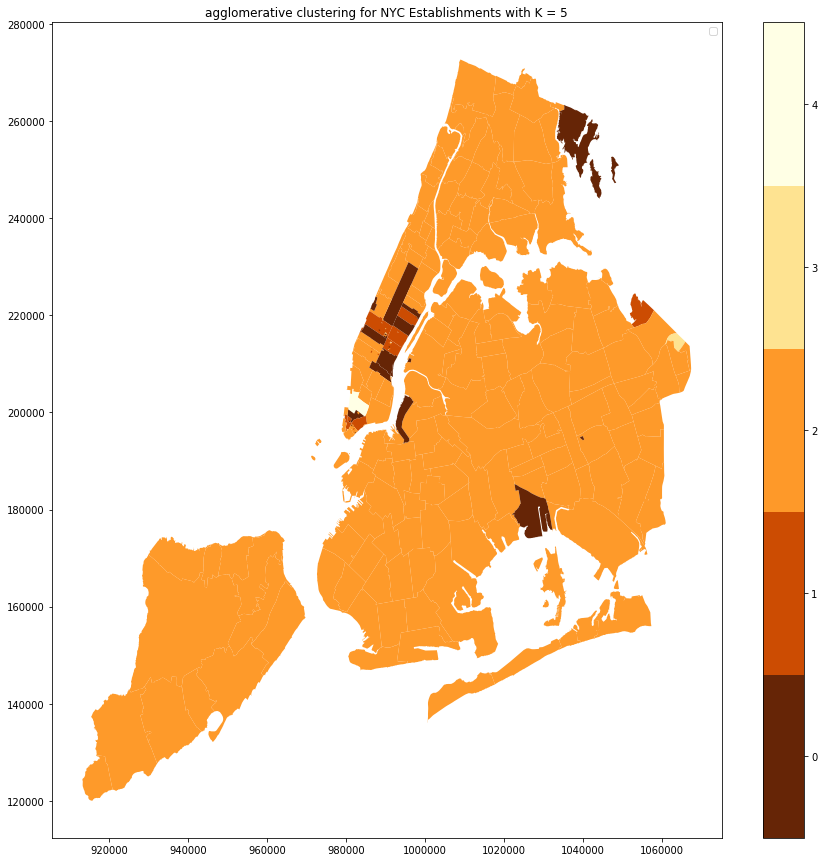

In [1414]:
nc = 5
f, ax = plt.subplots(1, figsize=(15, 15))  
#setting for discrete colorbar legend
cmap = plt.get_cmap("YlOrBr_r", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust_agc5', ax = ax, cmap = 'YlOrBr_r')
ax.legend(nyczipsshp['clust_agc5'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('agglomerative clustering for NYC Establishments with K = 5')

### Figure 6: 
cloropleth of  cluster centers for 5 agglomerative of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

###### 3 clusters

In [1381]:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [1373]:
nc = 3
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag3 = agc.labels_
#centroidsag = np.zeros((nc, vals.shape[1]))
print(labelsag3.shape)
labelsag3

(240,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 1, 2])

In [1376]:
clust_agc3={cleancsb.index[i].astype('int64'):labelsag3[i] for i in range(len(labelsag3))}

In [1377]:
vals['clust_agc3'] = [map_clust(x, clust_agc3) for x in vals.index]
nyczipsshp['clust_agc3'] = [map_clust(x, clust_agc3) for x in nyczipsshp.ZIPCODE.astype('int64')]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


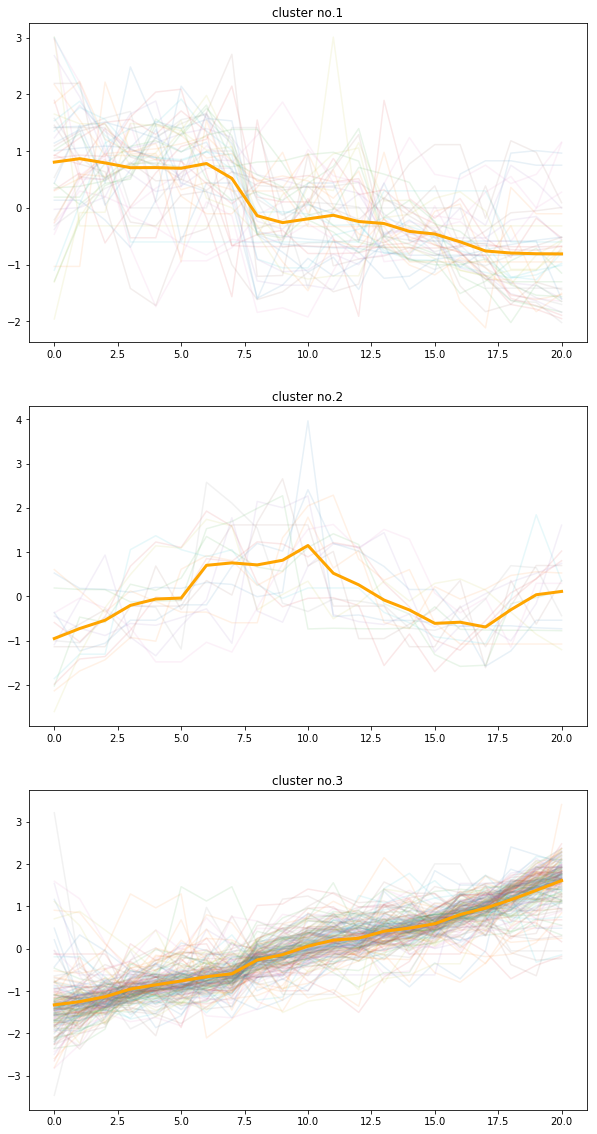

In [1378]:
fig = plt.figure(figsize = (10,20))
for i in range (nc):
    for idx, rows in vals[vals.clust_agc3 == i].iterrows():
#         print(idx,rows)
        ax = fig.add_subplot(nc,1,i+1)
        ax.plot(list(range(len(rows)-1)),rows[:-1],alpha=0.1)
    ax.plot(range(21), vals[vals.clust_agc3 == i].iloc[:,:-1].mean(axis=0), color = 'orange',linewidth = 3)
        
#     ax = fig.add_subplot()
#     nyczipsshp[nyczipsshp.clust == 1.0].plot(alpha=0.5)

    ax.set_title('cluster no.%d'%(i+1))

Text(0.5,1,'agglomerative clustering for NYC Establishments with K = 3')

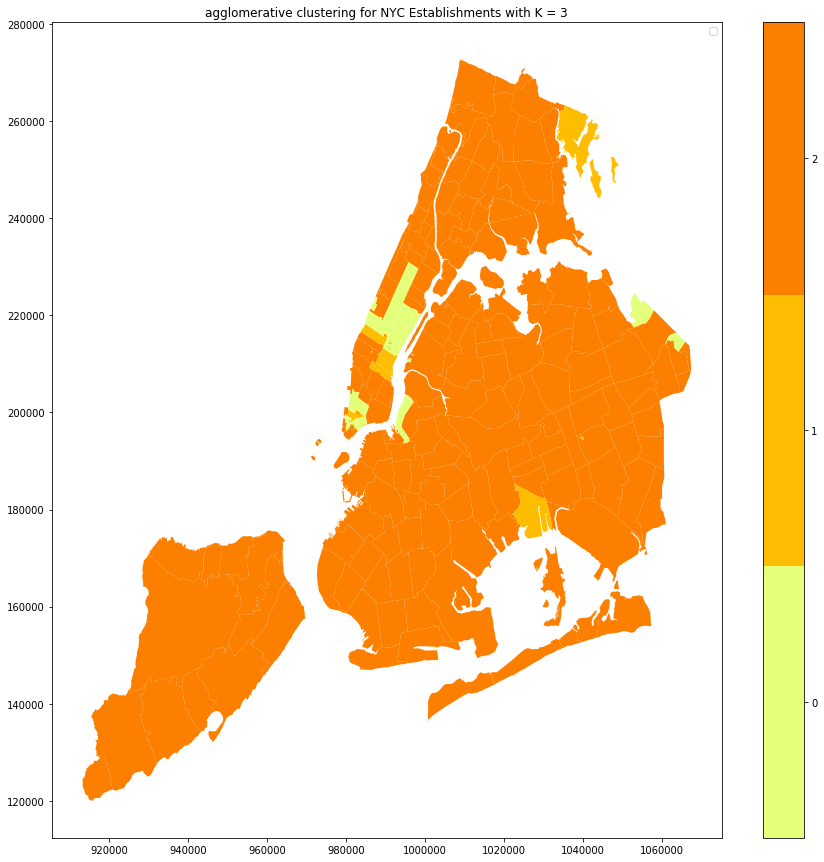

In [1415]:
nc = 3
f, ax = plt.subplots(1, figsize=(15, 15))  
#setting for discrete colorbar legend
cmap = plt.get_cmap("Wistia", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust_agc3', ax = ax, cmap = 'Wistia')
ax.legend(nyczipsshp['clust_agc3'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('agglomerative clustering for NYC Establishments with K = 3')

### Figure 7: 
cloropleth of cluster centers for 3 agglomerative clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

###### 7 clusters

In [1408]:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [1409]:
nc = 7
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag7 = agc.labels_
#centroidsag = np.zeros((nc, vals.shape[1]))
print(labelsag7.shape)
labelsag7

(240,)


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 1, 0, 3, 3, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       5, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 4, 3, 0, 3, 0, 0, 3,
       3, 3, 5, 0, 4, 1, 0, 0, 5, 3, 0, 4, 0, 3, 0, 0, 3, 3, 4, 3, 0, 1, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 4, 2, 2, 0, 1, 1, 0, 3, 0, 5, 3,
       0, 0, 3, 3, 3, 5, 2, 3, 5, 3])

In [1410]:
clust_agc7={cleancsb.index[i].astype('int64'):labelsag7[i] for i in range(len(labelsag7))}

In [1411]:
vals['clust_agc7'] = [map_clust(x, clust_agc7) for x in vals.index]
nyczipsshp['clust_agc7'] = [map_clust(x, clust_agc7) for x in nyczipsshp.ZIPCODE.astype('int64')]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


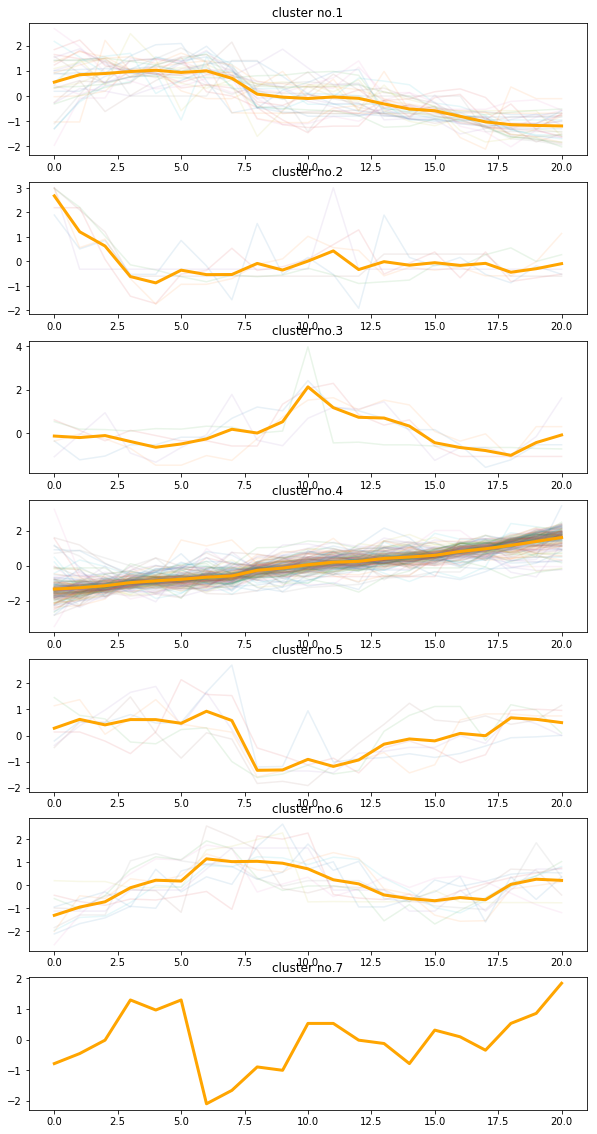

In [1412]:
fig = plt.figure(figsize = (10,20))
for i in range (nc):
    for idx, rows in vals[vals.clust_agc7 == i].iterrows():
#         print(idx,rows)
        ax = fig.add_subplot(nc,1,i+1)
        ax.plot(list(range(len(rows)-1)),rows[:-1],alpha=0.1)
    ax.plot(range(21), vals[vals.clust_agc7 == i].iloc[:,:-1].mean(axis=0), color = 'orange',linewidth = 3)
        
#     ax = fig.add_subplot()
#     nyczipsshp[nyczipsshp.clust == 1.0].plot(alpha=0.5)

    ax.set_title('cluster no.%d'%(i+1))

Text(0.5,1,'agglomerative clustering for NYC Establishments with K = 7')

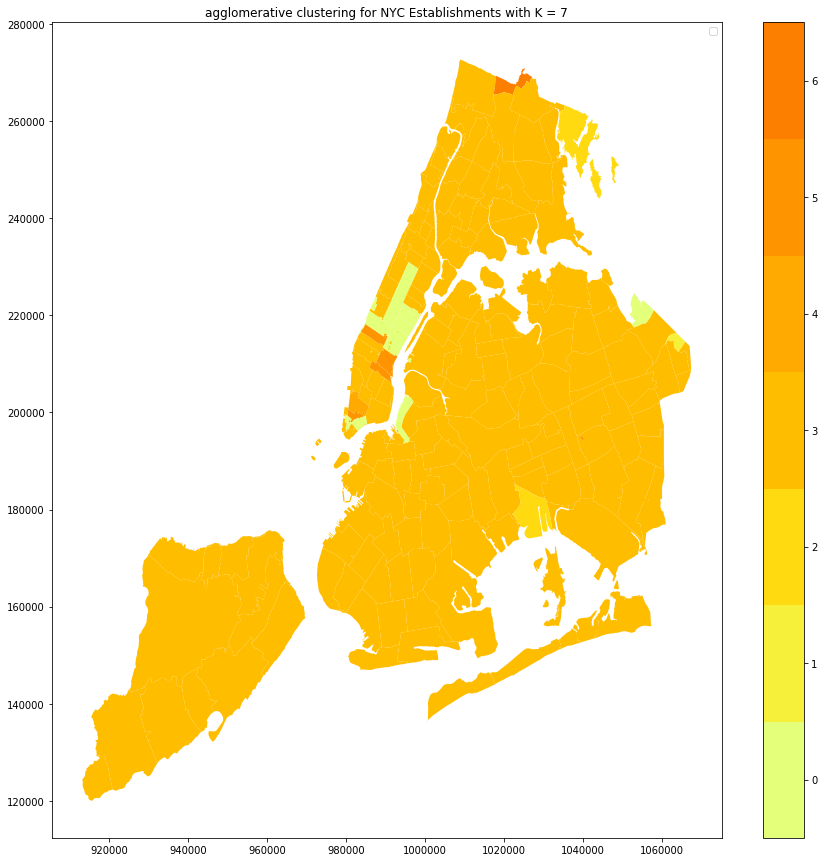

In [1416]:
nc = 7
f, ax = plt.subplots(1, figsize=(15, 15))  
#setting for discrete colorbar legend
cmap = plt.get_cmap("Wistia", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust_agc7', ax = ax, cmap = 'Wistia')
ax.legend(nyczipsshp['clust_agc7'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('agglomerative clustering for NYC Establishments with K = 7')

### Figure 8: 
cloropleth of cluster centers for 7 agglomerative clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### hierarchical clustering in scipy

In [1449]:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [1450]:
zipcodes_list = list(nyczipsshp['ZIPCODE'])

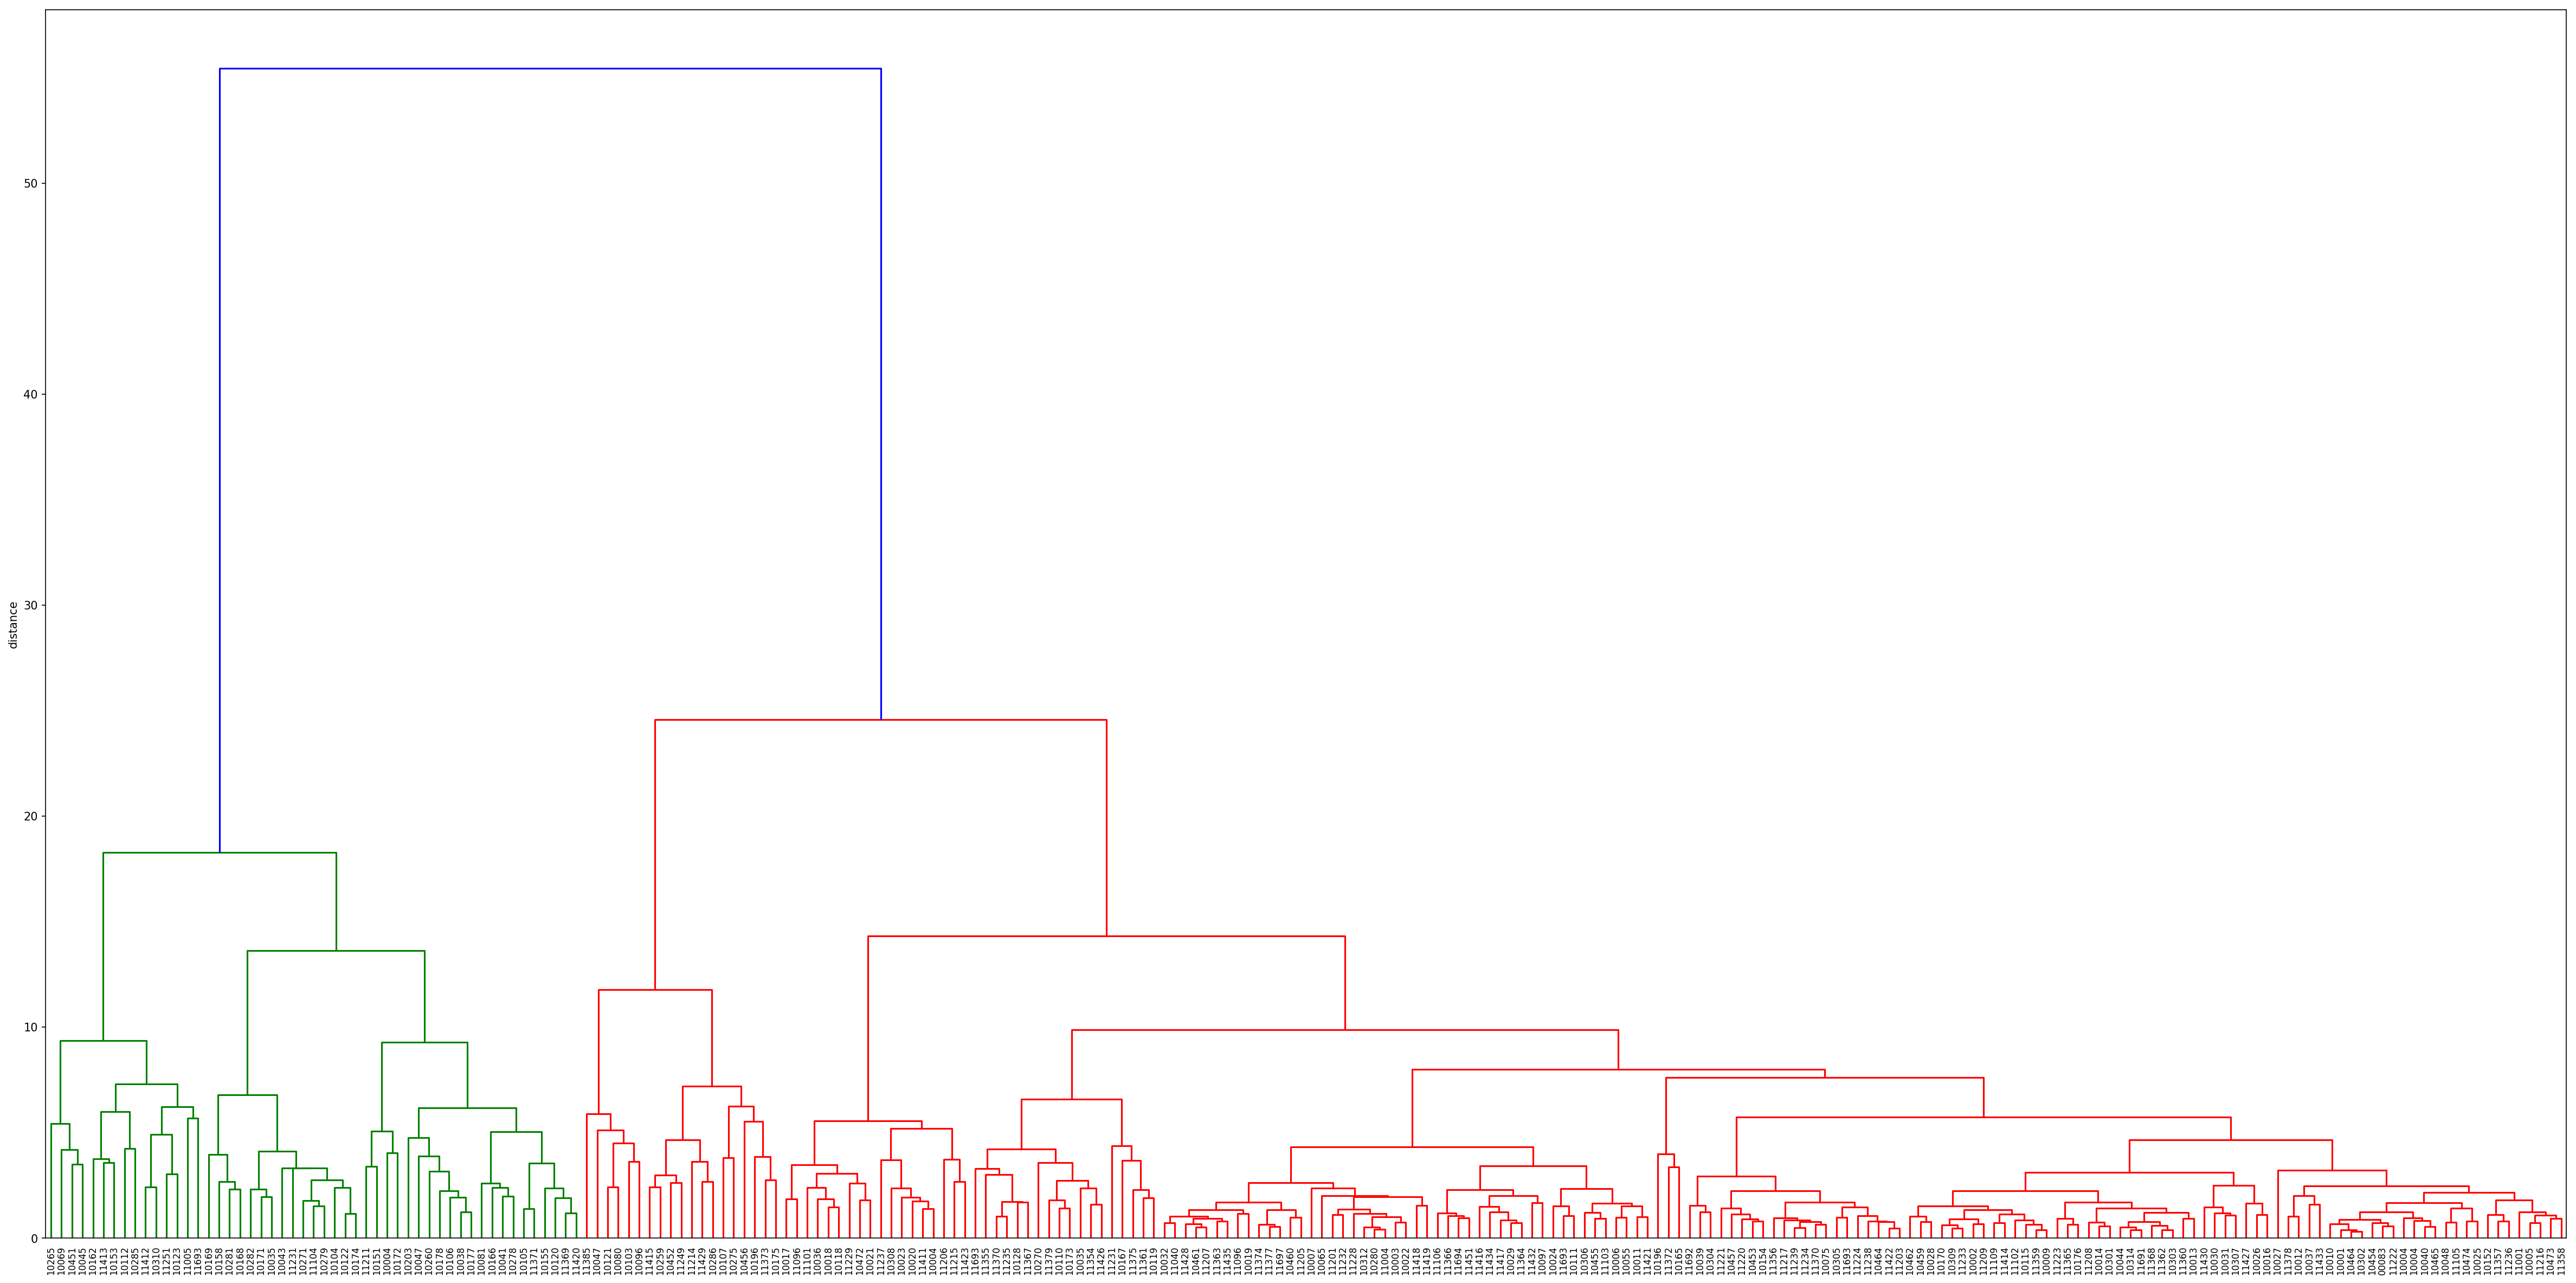

In [1457]:
import scipy.cluster as scp
fig = pl.figure(figsize=(40,20), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes_list, leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


### figure 9:
hierarchical clustering in scipy

### Compare the 2 different clustering algorithm

###### 3 clusters:

In [1473]:
ax.legend?

Text(0.5,1,'agglomerative clustering for NYC Establishments with K = 3')

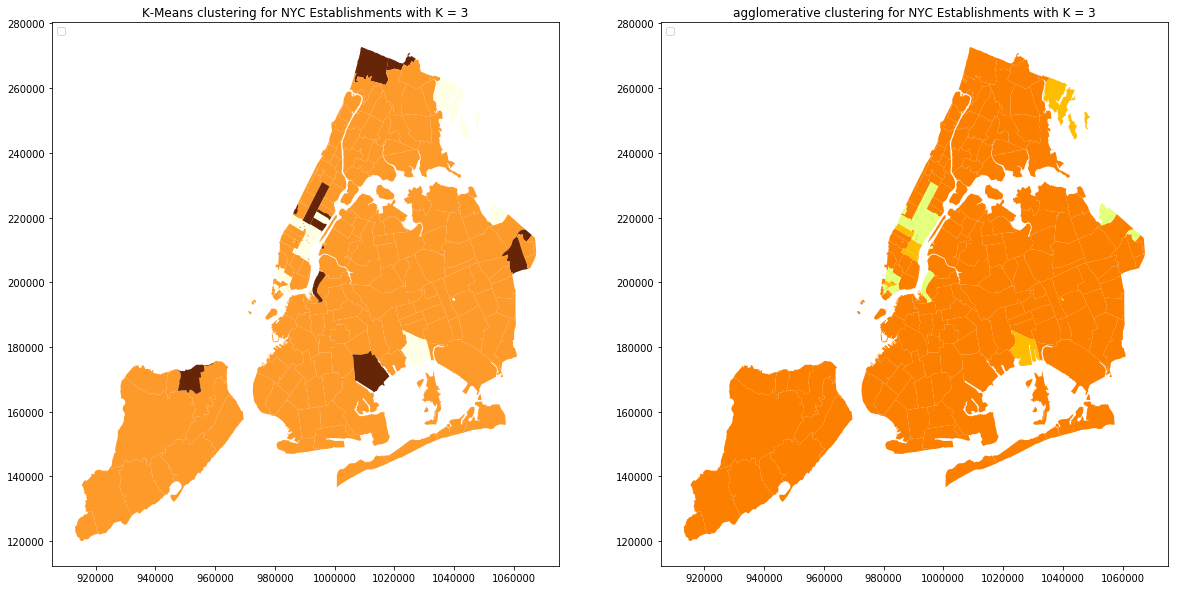

In [1522]:
nc = 3
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121)
cmap = plt.get_cmap("YlOrBr_r", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust3', ax = ax, cmap = 'YlOrBr_r')
ax.legend(nyczipsshp['clust3'],loc = "upper left")
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('K-Means clustering for NYC Establishments with K = 3')

ax = fig.add_subplot(122)
cmap = plt.get_cmap("Wistia", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust_agc3', ax = ax, cmap = 'Wistia')
ax.legend(nyczipsshp['clust_agc3'],loc = "upper left")
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('agglomerative clustering for NYC Establishments with K = 3')


In [1476]:
nyczipsshp.head(2)

,ZIPCODE,geometry,clust,clust3,clust7,clust_agc5,clust_agc3,clust_agc7
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",2.0,1.0,3.0,2.0,2.0,3.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",2.0,1.0,3.0,2.0,2.0,3.0


Text(0.5,1,'agglomerative clustering for NYC Establishments with K = 5')

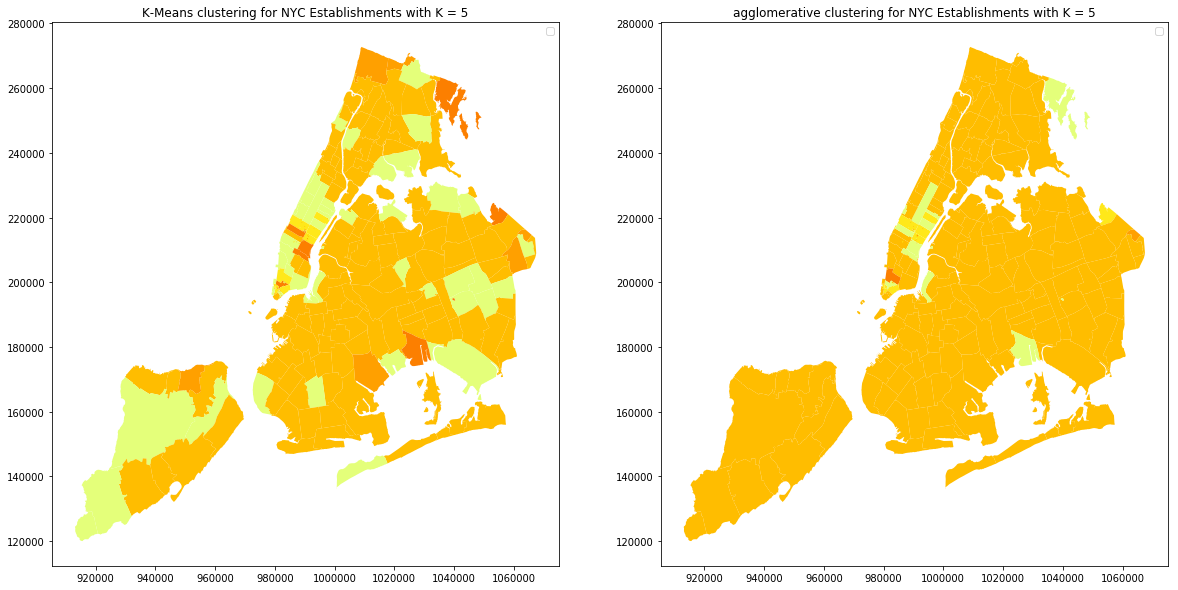

In [1514]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121)
cmap = plt.get_cmap("Wistia", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust', ax = ax, cmap = 'Wistia')
ax.legend(nyczipsshp['clust'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('K-Means clustering for NYC Establishments with K = 5')

ax = fig.add_subplot(122)
cmap = plt.get_cmap("Wistia", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-1, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust_agc5', ax = ax, cmap = 'Wistia')
ax.legend(nyczipsshp['clust_agc5'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('agglomerative clustering for NYC Establishments with K = 5')

Text(0.5,1,'agglomerative clustering for NYC Establishments with K = 7')

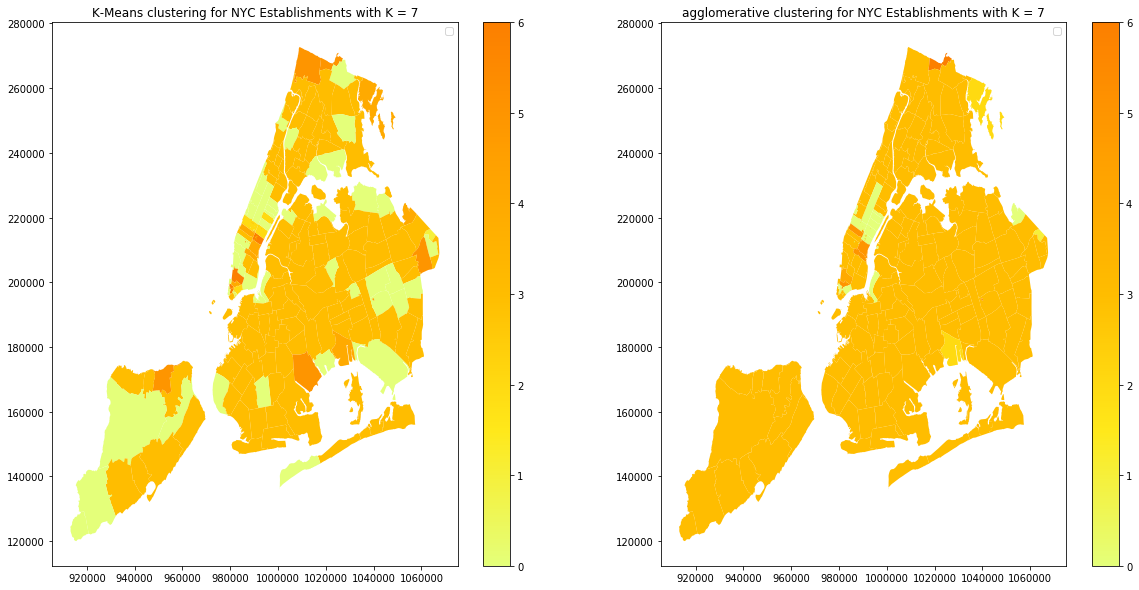

In [1502]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121)
cmap = plt.get_cmap("Wistia", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust7', ax = ax, cmap = 'Wistia',legend=True)
ax.legend(nyczipsshp['clust7'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('K-Means clustering for NYC Establishments with K = 7')

ax = fig.add_subplot(122)
cmap = plt.get_cmap("Wistia", nc)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,nc+1)-0.5, nc)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
nyczipsshp.plot(column = 'clust_agc7', ax = ax, cmap = 'Wistia',legend=True)
ax.legend(nyczipsshp['clust_agc7'])
f.colorbar(sm, ticks=np.arange(0,nc))

ax.set_title('agglomerative clustering for NYC Establishments with K = 7')

### Discuss:
As shown above, K-means and agglomerative generate defferent results. I think the reason is that these two algorithm uses defferent way to calculate the weights of the distance between clusters. I think the agglomerative clusters make more sense, while K-means clusters dectects more difference between adjacent areas.